In [1]:
import numpy as np
import scipy.io
import os
import cv2
import math
import matplotlib.pyplot as plt
import sklearn
import h5py
from scipy.io import loadmat
import data_preprocessing
from data_preprocessing import extract_single_frame_from_displacementNorm
from data_preprocessing import process_one_patient
from data_preprocessing import process_one_file

2023-04-10 12:17:12.443132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 12:17:17.952924: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /DATA/nyeshlur/venv/lib/python3.9/site-packages/cv2/../../lib64::/usr/local/cuda-11.2/extras/CUPTI/lib64:/usr/local/cuda-11.2/extras/CUPTI/lib64
2023-04-10 12:17:17.953423: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or direc

In [2]:
# data_dir = "/DATA/TBI/jesseDATA"
# data_dir = "/DATA/TBI/phan92DATA/tbi_diagnosis/data/raw/cardiac_displacement_3_updated_Oct13"

In [3]:
# mat = scipy.io.loadmat('/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat')

In [4]:
# mat.keys()
# # mat.values()
# x = mat.items()
# print(x)
# print(mat['displacementNorm'])

In [5]:
# patient_1 = process_one_patient("/DATA/TBI/jesseDATA/DoD001", 256, 256, 1)
# print(patient_1[0])
# print(patient_1[1])
# print(patient_1[2])
# print(patient_1[3])
# type(patient_1)
# len(patient_1)
# type(patient_1[0])
# len(patient_1[0])
# type(patient_1[0][0])
# len(patient_1[0][0])
# print(patient_1[0][0])
# print(patient_1[0][0][0])
# frame_list = []
# for i in range(0, 29):
#     frame_list.append(np.average(patient_1[0][i]))
#     print(frame_list)
# max(frame_list)
# frame_list.index(1.1102230246251565e-16)
# np.argmax(frame_list)

In [109]:
def find_max_displacement(filepath, cardiac_cycle=0):
    rawData = loadmat(filepath)
    displacement = np.array(list(rawData['displacementNorm']))
    
    # displacementNorm has shape (x_dim, y_dim, 30, n_cycles)
    disShape = displacement.shape
    print(disShape)
    
    displace_data = np.zeros([disShape[0],disShape[1], disShape[2]])
    # print(displace_data.shape)
    
    displace_data[:,:] = displacement[:, :, :, cardiac_cycle]
    displace_data = np.array(displace_data.astype('float64'))
    
    disp_avg_list = []
    for i in range(0, 29):
        disp_avg_list.append(np.average(displace_data[:, :, i]))
    # print(disp_avg_list)
    
    print("max displacement averaged:")
    print(max(disp_avg_list)) # disp_avg_list.index()
    print("max displacement frame:")
    print(np.argmax(disp_avg_list))
    
    plt.plot(disp_avg_list)

(259, 80, 30, 9)
max displacement averaged:
0.0021829680170182353
max displacement frame:
25


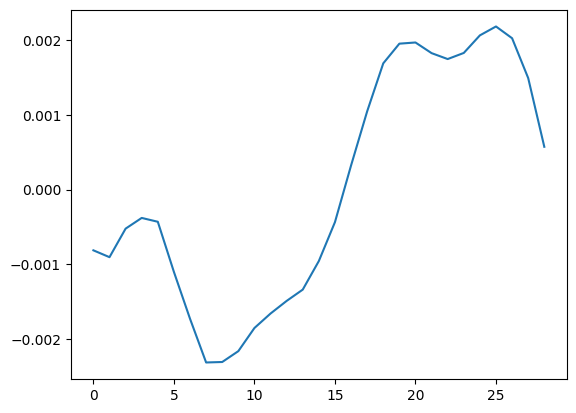

In [110]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter001_RC1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged:
0.006503995219521169
max displacement frame:
0


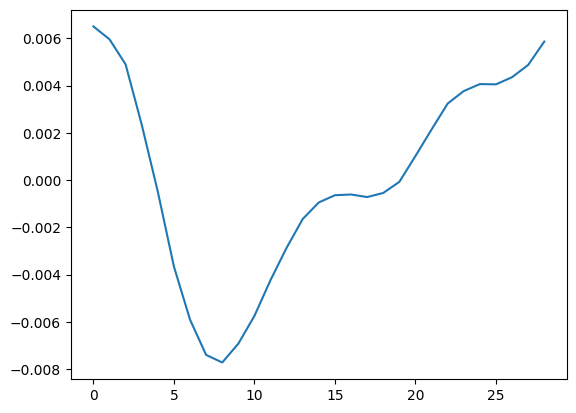

In [111]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter002_RA1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged:
0.00557190393743238
max displacement frame:
0


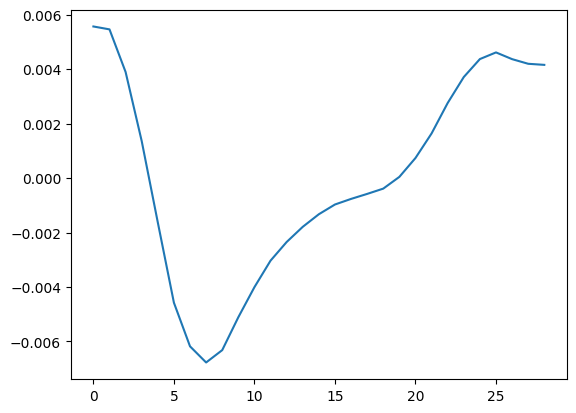

In [112]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter003_RO1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged:
0.0015294449432088953
max displacement frame:
28


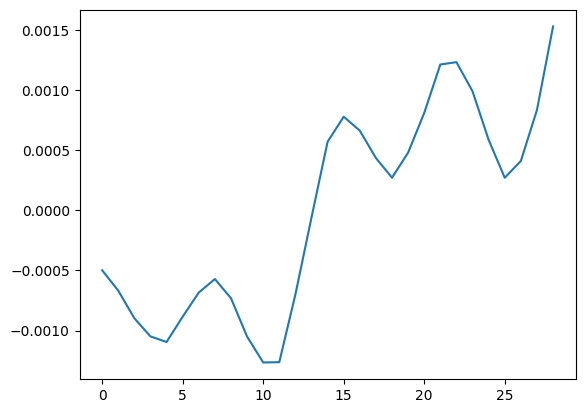

In [113]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter004_RC2_Displacement_Normalized_3.mat")

(259, 80, 30, 8)
max displacement averaged:
0.002412422742796683
max displacement frame:
23


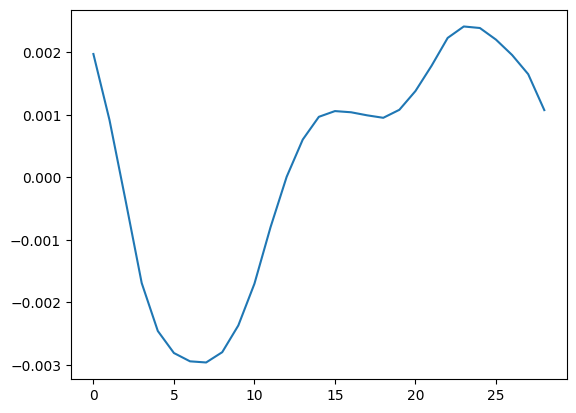

In [114]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter017_LC1_Displacement_Normalized_3.mat")

(259, 80, 30, 9)
max displacement averaged:
0.0021051533108477492
max displacement frame:
28


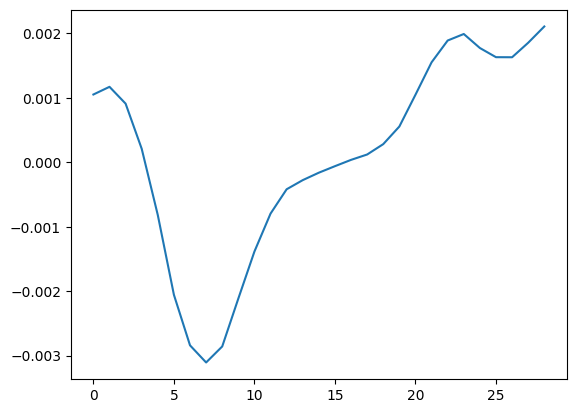

In [115]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter016_LA1_Displacement_Normalized_3.mat")

(259, 80, 30, 10)
max displacement averaged:
0.0028479556305832077
max displacement frame:
0


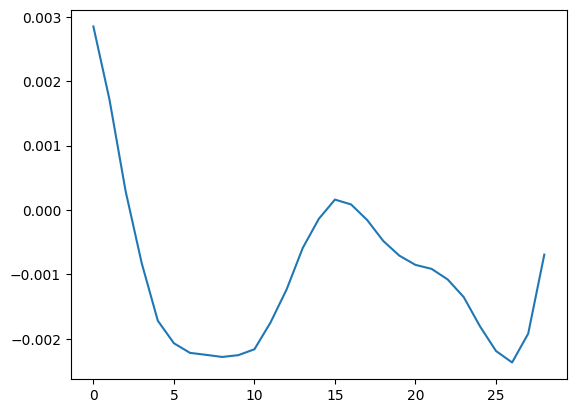

In [116]:
find_max_displacement("/DATA/TBI/jesseDATA/DoD001/DoD001_Ter018_LO1_Displacement_Normalized_3.mat")